In [66]:
# Adrian Kokoszka 19727
# importowanie potrzebnych bibliotek
import tensorflow as tf #biblioteka tensorflow, aby móc korzystać z funkcji związanych z uczeniem maszynowym
import numpy as np #biblioteka numpy, aby móc korzystać z funkcji związanych z obliczeniami numerycznymi
import matplotlib.pyplot as plt #biblioteka matplotlib, aby móc korzystać z funkcji związanych z rysowaniem wykresów
from mpl_toolkits.mplot3d import Axes3D #biblioteka do rysowania wykresów 3D
print(tf.__version__) #sprawdzenie wersji biblioteki tensorflow


2.11.0


In [67]:
observations=1000 #ilość obserwacji
xs = np.random.uniform(low=-10,high=10, size=(observations,1)) #losowanie wartości z zakresu od -10 do 10 i zapisanie ich do tablicy xs
xz = np.random.uniform(low=-10,high=10, size=(observations,1)) #losowanie wartości z zakresu od -10 do 10 i zapisanie ich do tablicy xz
inputs=np.column_stack((xs,xz)) #łączenie dwóch tablic w jedną
print(inputs.shape) #wypisanie rozmiaru tablicy, w tym przypadku 1000 wierszy i 2 kolumny

(1000, 2)


In [68]:
noise = np.random.uniform(low=-1,high=1, size=(observations,1)) # losowanie wartości szumu z zakresu od -1 do 1 i zapisanie ich do tablicy noise
targets = 2*xs - 3*xz + 5 + noise #funkcja liniowa, która ma być wyznaczona przez sieć neuronową 
np.savez('TF_dataset', inputs=inputs, targets=targets)# zapisanie danych do pliku .npz
print(targets.shape) # wypisanie rozmiaru tablicy, w tym przypadku 1000 wierszy i 1 kolumna

(1000, 1)


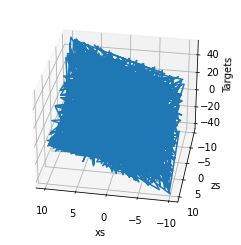

In [69]:
targets = targets.reshape(observations,) #zmiana rozmiaru tablicy targets bez zmiany jej zawartości
xs = xs.reshape(observations,) #zmiana rozmiaru tablicy xs, bez zmiany jej zawartości
xz = xz.reshape(observations,) #zmiana rozmiaru tablicy xz bez zmiany jej zawartości
fig = plt.figure() #tworzenie wykresu
ax = fig.add_subplot(111, projection='3d') #wyswietlanie wykresu w trzech wymiarach
ax.plot(xs,xz,targets) #rysowanie wykresu
ax.set_xlabel('xs') #podpisanie osi x
ax.set_ylabel('zs') #podpisanie osi y
ax.set_zlabel('Targets') #podpisanie osi z
ax.view_init(azim=100) #ustawienie kąta widzenia wykresu na 100 stopni
plt.show() #wyświetlenie wykresu

In [70]:
init_range = 0.1 #zakres losowania wartości początkowych
weights = np.random.uniform(low=-init_range,high=init_range, size=(2,1)) #losowanie wag z zakresu -0.1 do 0.1 i zapisanie ich do tablicy weights
biases = np.random.uniform(low=-init_range,high=init_range, size=1) #losowanie biasów z zakresu -0.1 do 0.1 i zapisanie ich do tablicy biases
print(weights,biases)   #wypisanie wartości początkowych weights i biases

[[-0.09260147]
 [ 0.06073318]] [-0.02994002]


In [71]:
targets = targets.reshape(observations,1) #Przekształcenie tablicy targets do postaci 1000 wierszy (obserwacji) i 1 kolumny
eta = 0.02 #współczynnik uczenia sieci neuronowej 
for i in range (100): #pętla wykonująca się 100 razy 
    outputs = np.dot(inputs, weights) + biases #obliczenie wartości wyjściowej sieci neuronowej 
    deltas = outputs - targets #obliczenie wartości błędu sieci neuronowej 
    
    loss = np.sum(deltas ** 2)/2/observations #obliczenie wartości funkcji kosztu
    print(loss) #wypisanie wartości funkcji kosztu     
    
    deltas_scaled = deltas/observations #obliczenie wartości błędu sieci neuronowej 
    weights = weights - eta * np.dot(inputs.T, deltas_scaled) #obliczenie nowych wartości weights, które są wykorzystywane w kolejnej iteracji pętli 
    biases = biases - eta * np.sum(deltas_scaled) #obliczenie nowych wartości biases, które są wykorzystywane w kolejnej iteracji pętli
    

241.7449327572902
36.2344395445423
14.463004659081577
11.782531727385814
11.103054124505304
10.647714233093232
10.230941638200209
9.832789713819777
9.450598656099952
9.083536363054682
8.730983804304975
8.39236530036721
8.06712990770037
7.754748666305081
7.454713544093116
7.166536590056768
6.889749138528192
6.623901046751612
6.368559962786177
6.123310622364177
5.887754173541514
5.661507528039974
5.4442027382261475
5.235486398713793
5.035019071616405
4.8424747345153225
4.657540250245554
4.479914857637035
4.3093096823831605
4.145447267240999
3.988061120799279
3.836895284080196
3.6917039142702612
3.5522508849031813
3.4183094018445592
3.2896616344538696
3.1660983613238747
3.047418630021343
2.9334294302756945
2.823945380084082
2.718788424222419
2.617787544672031
2.520778482491
2.4276034706778766
2.338110977593318
2.252155460522355
2.169597128976542
2.090301717350997
2.0141402665666495
1.9409889143425276
1.8707286937570624
1.8032453397707433
1.7384291033955188
1.6761745732087057
1.61638050392

In [72]:
print (weights, biases) #wypisanie wartości weights i biases po 100 iteracjach pętli

[[ 1.9915436 ]
 [-2.99524921]] [4.343558]


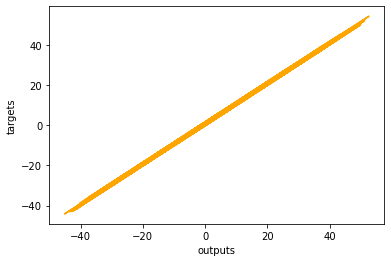

In [73]:
plt.plot(outputs, targets, color='orange') #rysowanie wykresu, gdzie osie x i y to outputs i targets
plt.xlabel('outputs') #podpisanie osi x
plt.ylabel('targets') #podpisanie osi y
plt.show() #wyświetlenie wykresu